1.15641510857 alpha
1.11528602787 alpha
1.07236973625 alpha
1.03595999046 alpha
0.996194161021 alpha
0.959613672638 alpha
0.923527081397 alpha
0.886983258025 alpha
0.852450059203 alpha
0.820807943618 alpha
0.788566091044 alpha
0.758578551269 alpha
0.731758337442 alpha
0.704665094108 alpha
0.679530026808 alpha
0.657208612869 alpha
0.637104298294 alpha
0.619243333337 alpha
0.602321025472 alpha
0.586579858983 alpha
0.572036091808 alpha
0.560123943289 alpha
0.549735254261 alpha
0.541049139116 alpha
0.534040394864 alpha
0.527815207765 alpha
0.522498590865 alpha
0.518333369596 alpha
0.514976586057 alpha
0.512193361449 alpha
0.509752357403 alpha
0.507889113431 alpha
0.506273831002 alpha
0.505038026974 alpha
0.504103226137 alpha
0.503268658226 alpha
0.502639069631 alpha
0.502113701633 alpha
0.501671368137 alpha
0.501341515923 alpha
0.501089412091 alpha
0.500872724021 alpha
0.500699514077 alpha
0.500566374643 alpha
0.500448931213 alpha
0.500357666964 alpha
minimum alpha =  0.500357666964


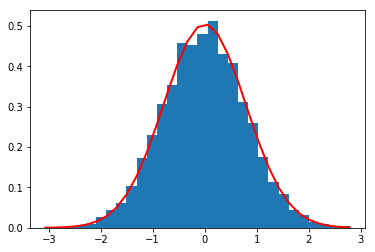

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

## variational quantum monte carlo simulation
## initialize

N = 10000

def normal_dis(sigma):
    prob_dens = np.random.normal(0, sigma, N)
    return(prob_dens)
    
def expectation_value(E_loc):
    E = (1/N)*np.sum(E_loc)
    return(E)

def variance(E_loc):
    var = (1/N)*np.sum(E_loc**2) - ((1/N)*np.sum(E_loc))**2
    return(var)

def derivative_E(alpha):
    sigma = 1/np.sqrt(4*alpha)
    prob_dens = normal_dis(sigma)
    E_loc = alpha + (prob_dens**2)*(0.5-2*alpha**2)
    E_ground = expectation_value(E_loc)
    deriv_E = 2*(expectation_value(-E_loc*prob_dens**2) - E_ground*expectation_value(-prob_dens**2))
    return(deriv_E)

def minimization_alpha():
    gamma = 0.1
    tol = 0.0001
    max_it = 10000
    alpha_min = 1.2
    difference = 1.2
    i = 0
    
    while abs(difference) >= tol and i < max_it:
        keep = alpha_min
        alpha_min = alpha_min - gamma * derivative_E(alpha_min)
        difference = alpha_min - keep
        print(alpha_min, 'alpha')
        i += 1
    print("minimum alpha = ", alpha_min)
    

    
def metropolis_algorithm(N, alpha):
    x = np.zeros(N)
    x[0] = 0.1
    h = 1/1000
    eta = np.random.uniform(0,1)
    t = 0
    for i in range(len(x)):
        x_trial = np.random.uniform(-h/2, h/2)
        x_trial = x[i-1] + x_trial
        r = dens_function(alpha, x_trial)/dens_function(alpha, x[i])
        if r >= 1:
            t = t + 1
            x[i] = x_trial
        else:
            if eta < r:
                x[i] = x_trial
            else:
                x[i] = x[i-1]
    acceptance_ratio = t/len(x)
    print(acceptance_ratio)
    
    return(x)


metropolis_algorithm(100, alpha)

## run program

#E_ground, variance = vmc()
minimization_alpha()



## plots

#plt.figure()
#plt.plot(alpha, E_ground)
#plt.title('ground state energy')

#plt.figure()
#plt.plot(alpha, variance)
#plt.title('variance')



## histogram probability distribution function

alpha = 0.4
sigma = 1/np.sqrt(4*alpha)
density = normal_dis(sigma)

plt.figure()
count, bins, ignored = plt.hist(density, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
np.exp( - (bins)**2 / (2 * sigma**2) ),linewidth=2, color='r')
plt.show()


    




    
    
